### Importing required libraries

In [130]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### Reading the datasets

In [131]:
geo = pd.read_csv('datasets/Geo_scores.csv')
instance = pd.read_csv('datasets/instance_scores.csv')
lambdawts = pd.read_csv('datasets/Lambda_wts.csv')
qsets = pd.read_csv('datasets/Qset_tats.csv')
test = pd.read_csv('datasets/test_share.csv')
train = pd.read_csv('datasets/train.csv')

In [132]:
#getting the information on the datasets
print(geo.info())
print("********************"*5)
print(instance.info())
print("********************"*5)
print(lambdawts.info())
print("********************"*5)
print(qsets.info())
print("********************"*5)
print(test.info())
print("********************"*5)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 column

#### Inferences
1. geo dataset has 2 columns id  geo_score and 1424035 rows 
2. instance dataset has 2 columns id  instance_scores and 1424035 rows
3. lambdawts dataset has 2 columns Group  lambda_wt and 1400 rows
4. qsets dataset has 2 columns id  qsets_normalized_tat and 1424035 rows
5. train dataset has 28 columns and 227845 rows
6. test dataset has 27 columns and 56962 rows

#### Getting more info on each dataset

In [133]:
#getting the id value counts in geo dataset
geo.id.value_counts().head()

26674     5
149679    5
114110    5
24969     5
262179    5
Name: id, dtype: int64

In [134]:
#getting the unique no of ids in geo dataset
geo.id.nunique()

284807

In [135]:
#getting the id value counts in geo dataset
instance.id.value_counts().head()

173444    5
240342    5
147158    5
83677     5
127535    5
Name: id, dtype: int64

In [136]:
#getting the unique no of ids in instance dataset
instance.id.nunique()

284807

In [137]:
lambdawts.Group.value_counts().head()

Grp936     1
Grp1128    1
Grp341     1
Grp63      1
Grp173     1
Name: Group, dtype: int64

In [138]:
#getting the unique no of ids in geo dataset
lambdawts.Group.nunique()

1400

In [139]:
#getting the id value counts in qsets dataset
qsets.id.value_counts().head()

9983      5
146106    5
133237    5
262326    5
79108     5
Name: id, dtype: int64

In [140]:
#getting the unique no of ids in qsets dataset
qsets.id.nunique()

284807

#### Inferences
1. geo,instance,qsets datasets has multiple entries for same id and the unique id count is 284807 (equal to train + test row count)
2. lambdawts has 1400 unique Group data
3. target is the dependent column in train dataset

### Handling missing values

In [141]:
geo.isnull().sum()

id               0
geo_score    71543
dtype: int64

In [142]:
print('%of missing values is ',geo['geo_score'].isnull().sum()/len(geo)*100)

%of missing values is  5.023963596400369


<AxesSubplot: >

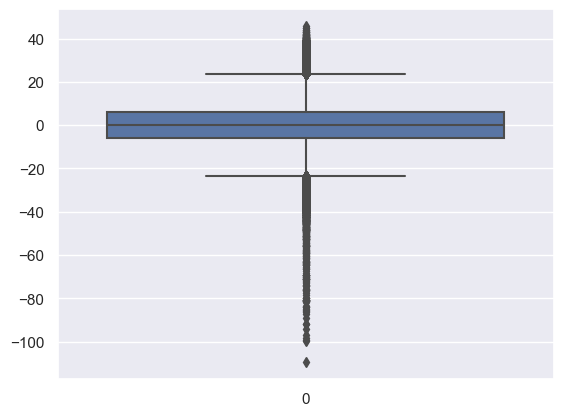

In [143]:
sns.boxplot(geo['geo_score'])

In [144]:
#Since outliers are visible imputing the missing values with median
geo.fillna(geo.median(),inplace=True)

In [145]:
geo.isnull().sum()

id           0
geo_score    0
dtype: int64

In [146]:
instance.isnull().sum()

id                 0
instance_scores    0
dtype: int64

In [147]:
qsets.isnull().sum()

id                           0
qsets_normalized_tat    103201
dtype: int64

In [148]:
print('% of missing values is ',qsets['qsets_normalized_tat'].isnull().sum()/len(qsets)*100)

% of missing values is  7.247083112423501


<AxesSubplot: >

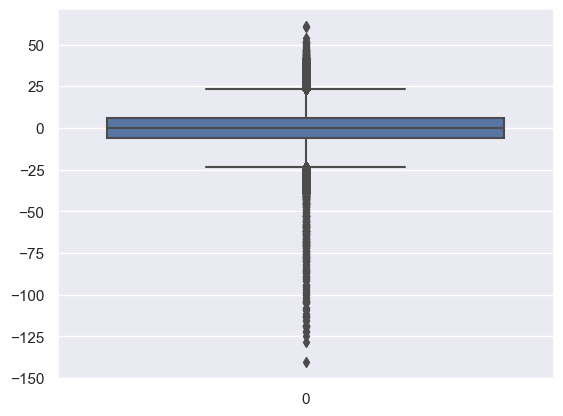

In [149]:
sns.boxplot(qsets['qsets_normalized_tat'])

In [150]:
#Since outliers are visible imputing the missing values with median
qsets.fillna(qsets.median(),inplace=True)

In [151]:
qsets.isnull().sum()

id                      0
qsets_normalized_tat    0
dtype: int64

In [152]:
lambdawts.isnull().sum()

Group        0
lambda_wt    0
dtype: int64

In [153]:
train.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [154]:
test.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64

### Appending the datasets to make a single dataset for EDA and data preprocessing

In [155]:
#Adding a new column data to indicate the train and test data
train['data']='train'
test['data']='test'

In [156]:
train.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,0.356667,0.530000,0.683333,1.096667,0.750000,0.860000,0.936667,0.680000,0.683333,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0,train
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,0.806667,0.436667,0.906667,0.736667,0.773333,0.543333,0.696667,0.630000,0.543333,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0,train
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,0.630000,0.870000,0.986667,1.053333,0.606667,0.246667,0.440000,0.633333,0.603333,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0,train
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,1.020000,0.413333,1.043333,0.720000,0.610000,0.930000,0.873333,0.736667,0.606667,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0,train
227844,22175,Grp143,1.006667,0.553333,0.946667,1.206667,0.406667,0.750000,0.520000,0.756667,1.053333,0.273333,-0.046667,0.503333,0.426667,0.453333,0.580000,0.593333,0.640000,0.646667,0.636667,0.683333,0.843333,0.580000,0.683333,0.676667,-235.0000,0,train


In [157]:
test.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,0.543333,0.586667,0.660000,0.970000,0.796667,0.626667,0.636667,0.700000,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,1.023333,0.293333,0.940000,0.896667,0.983333,0.936667,0.576667,0.643333,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,0.420000,0.480000,0.490000,1.023333,0.310000,0.906667,0.450000,0.536667,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,0.600000,0.500000,0.896667,0.876667,0.683333,0.850000,0.573333,0.643333,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,0.266667,0.586667,0.793333,0.780000,0.493333,0.623333,0.553333,0.543333,0.616667,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,test


In [158]:
#Appending the train and test data
final_data=pd.concat([train,test],axis=0)

In [159]:
final_data.shape

(284807, 29)

In [160]:
geo.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [161]:
#Grouping the ids and taking the mean of the geo_score
geo=geo.groupby('id').mean()
geo.head()

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540


In [162]:
geo.shape


(284807, 1)

In [163]:
#Merging the geo_score to the dataset based on id
final_data=pd.merge(final_data,geo,on='id',how='left')
final_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850


In [164]:
instance=instance.groupby('id').mean()
instance.shape

(284807, 1)

In [165]:
final_data=pd.merge(final_data,instance,on='id',how='left')
final_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47


In [166]:
qsets=qsets.groupby('id').mean()
qsets.shape

(284807, 1)

In [167]:
final_data=pd.merge(final_data,qsets,on='id',how='left')
final_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630


In [168]:
final_data=pd.merge(final_data,lambdawts,on='Group',how='left')
final_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


In [169]:
final_data.shape

(284807, 33)

### EDA using DTale

In [170]:
!pip install dtale

In [171]:
import dtale

In [172]:
dtale.show(final_data)

In [174]:
#Splitting the data into the train and test datasets
train=final_data[final_data['data']=='train']
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,0.643333,0.736667,0.756667,0.813333,0.693333,0.666667,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,0.613333,0.883333,0.653333,0.463333,0.483333,0.583333,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,0.730000,0.873333,0.923333,1.223333,0.686667,0.606667,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,0.466667,0.670000,0.526667,0.783333,0.856667,0.716667,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,0.683333,0.296667,0.780000,0.636667,0.783333,0.630000,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


In [175]:
test=final_data[final_data['data']=='test']
test.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
284802,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,0.543333,0.586667,0.660000,0.970000,0.796667,0.626667,0.636667,0.700000,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test,-0.114,-0.51,0.010,-0.40
284803,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,1.023333,0.293333,0.940000,0.896667,0.983333,0.936667,0.576667,0.643333,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test,0.110,-0.46,0.064,-1.54
284804,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,0.420000,0.480000,0.490000,1.023333,0.310000,0.906667,0.450000,0.536667,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test,-0.530,0.65,-0.020,0.29
284805,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,0.600000,0.500000,0.896667,0.876667,0.683333,0.850000,0.573333,0.643333,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test,0.270,-0.92,0.610,-0.69
284806,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,0.266667,0.586667,0.793333,0.780000,0.493333,0.623333,0.553333,0.543333,0.616667,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test,-0.664,1.57,0.354,-0.37


In [176]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,0.546667,0.530000,0.876667,0.450000,0.370000,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,NaN,test,0.25,-0.04,-0.426,0.76
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,0.966667,0.760000,0.576667,0.653333,0.553333,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,NaN,test,0.43,-0.77,-0.620,0.18
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,0.826667,0.826667,0.653333,0.663333,0.453333,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,NaN,test,1.32,0.11,-0.406,0.39
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,0.900000,0.433333,0.230000,1.323333,0.403333,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,NaN,test,-2.11,0.33,0.374,1.80
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,0.853333,0.583333,0.850000,1.090000,0.550000,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,NaN,test,-2.11,-0.37,-0.130,1.89


In [177]:
#To reset the indexes of the test dataset
test=test.reset_index(drop=True)

In [178]:
test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,0.546667,0.530000,0.876667,0.450000,0.370000,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,NaN,test,0.25,-0.04,-0.426,0.76
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,0.966667,0.760000,0.576667,0.653333,0.553333,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,NaN,test,0.43,-0.77,-0.620,0.18
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,0.826667,0.826667,0.653333,0.663333,0.453333,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,NaN,test,1.32,0.11,-0.406,0.39
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,0.900000,0.433333,0.230000,1.323333,0.403333,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,NaN,test,-2.11,0.33,0.374,1.80
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,0.853333,0.583333,0.850000,1.090000,0.550000,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,NaN,test,-2.11,-0.37,-0.130,1.89


In [179]:
#Splitting the data into independent and dependent features
x_train = train.drop(['id','Group','Target', 'data'], axis=1)
y_train = train['Target']
x_test = test.drop(['id','Group','Target','data'], axis=1)
y_test = test['Target']

### Outlier treatment

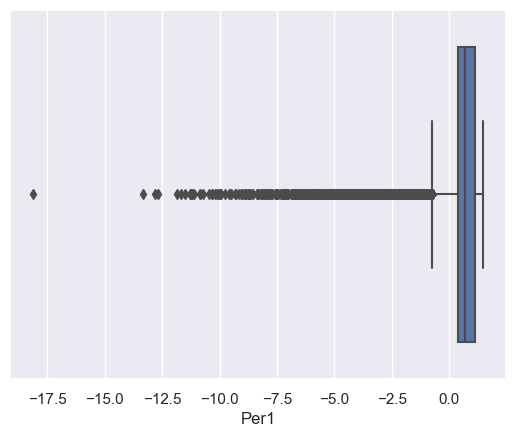

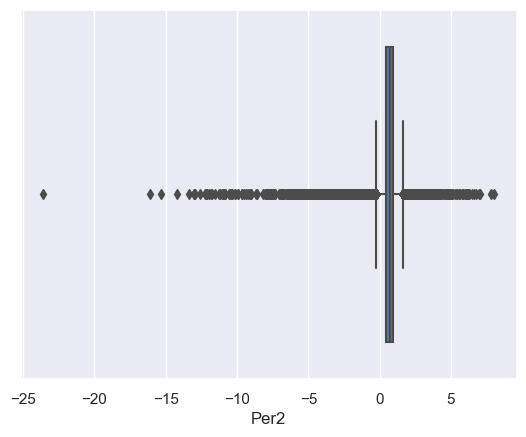

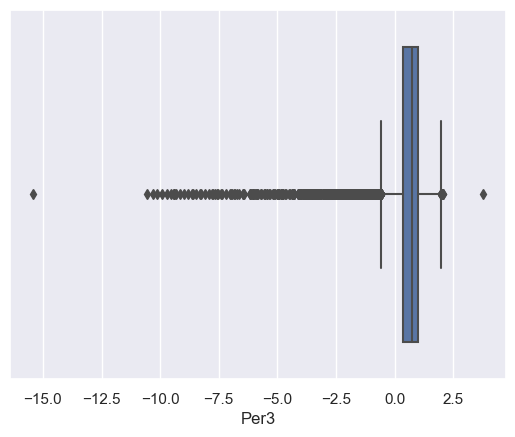

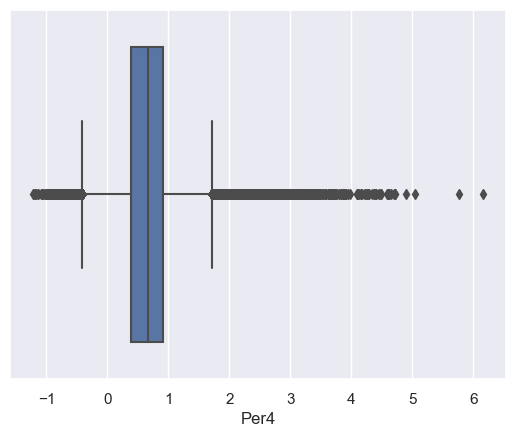

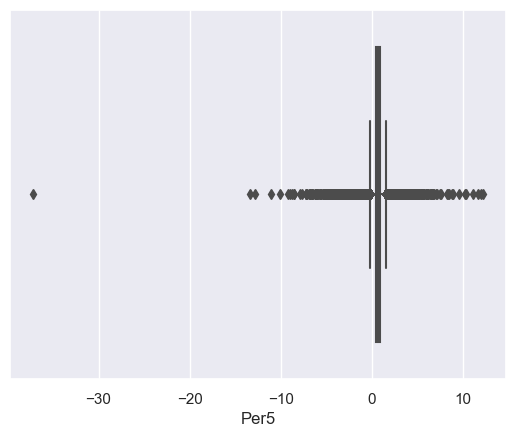

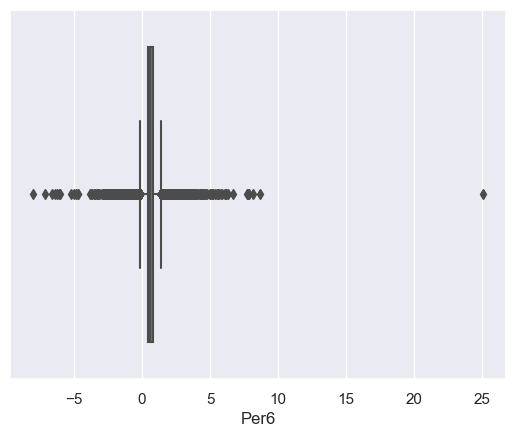

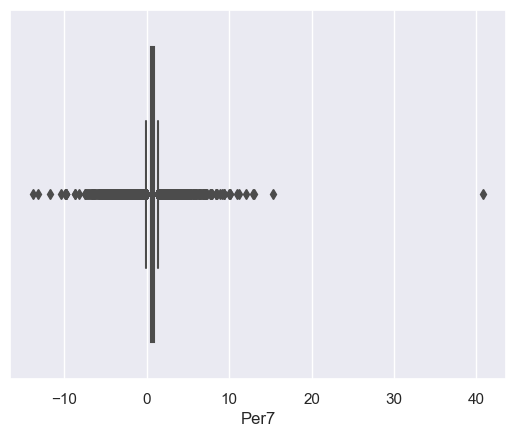

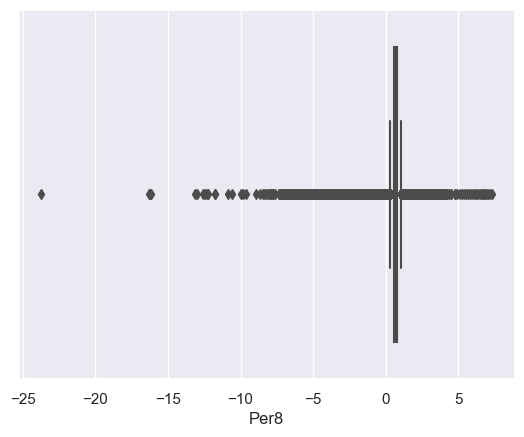

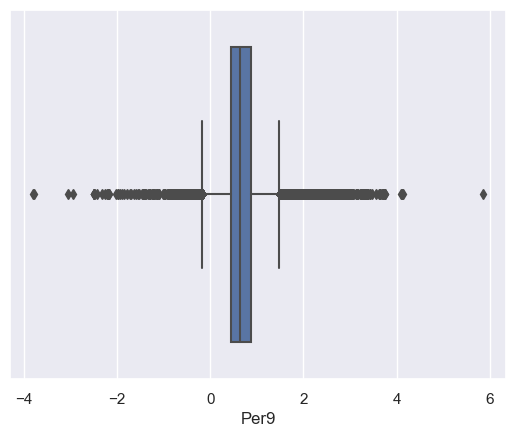

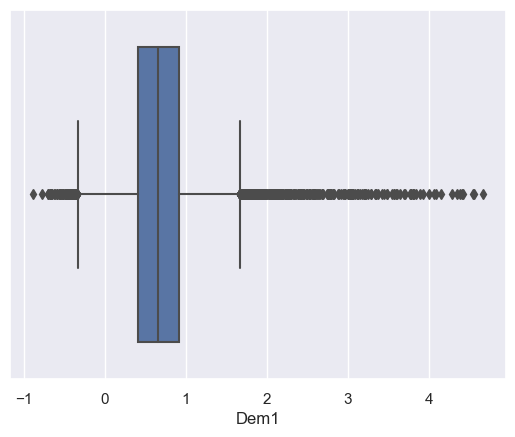

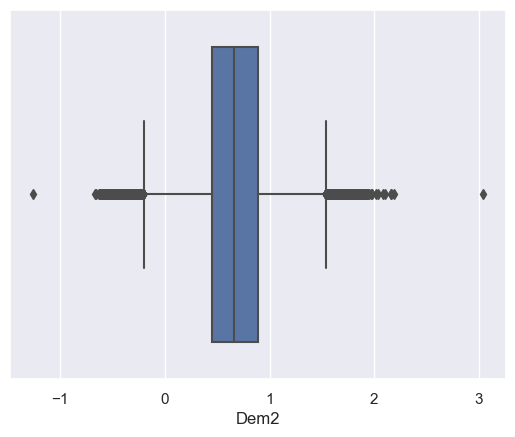

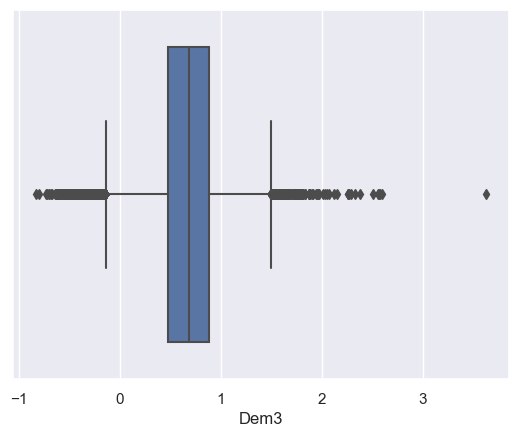

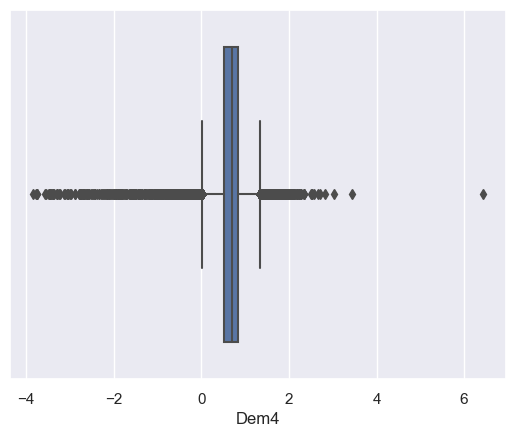

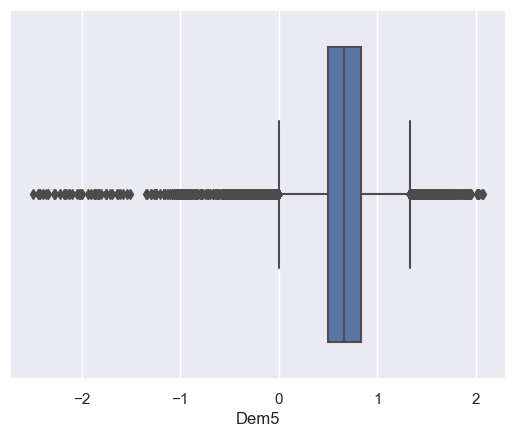

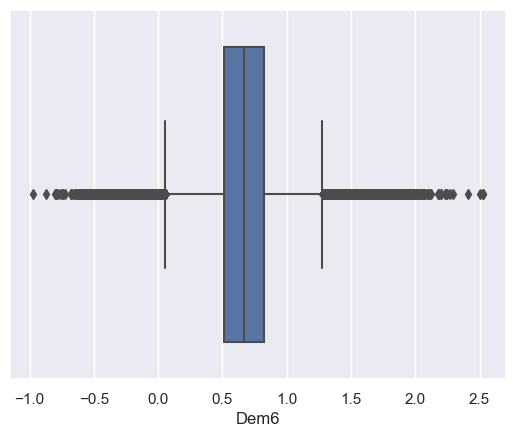

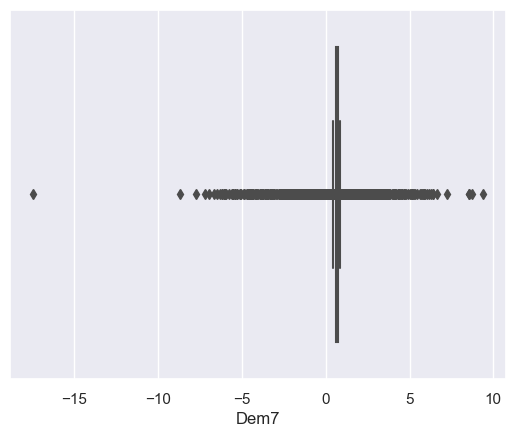

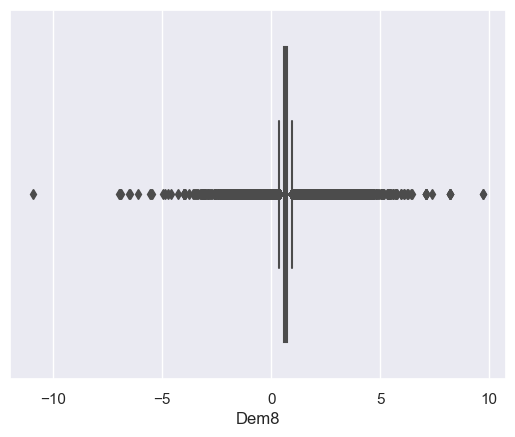

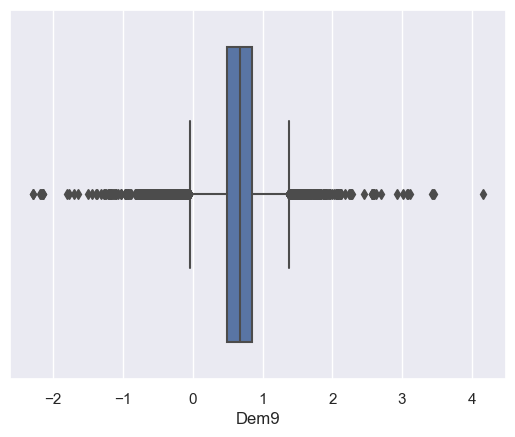

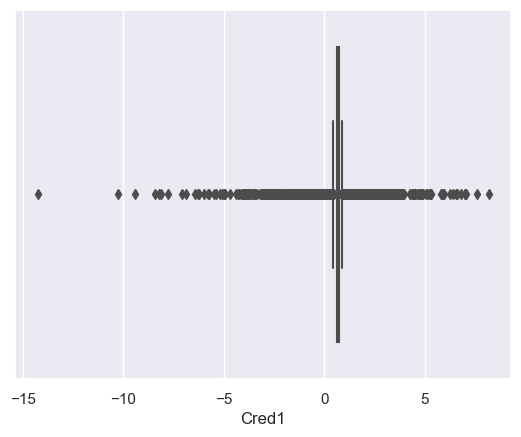

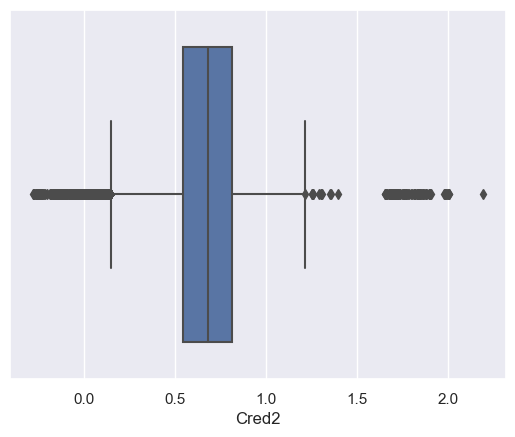

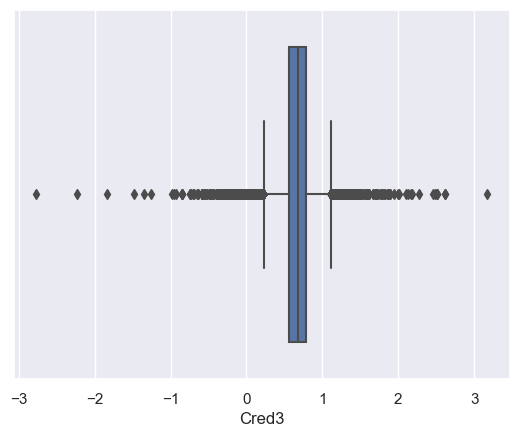

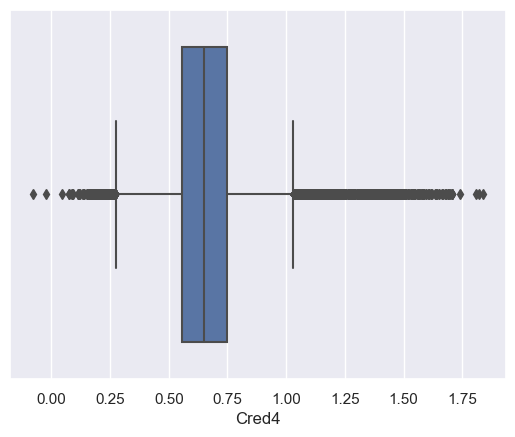

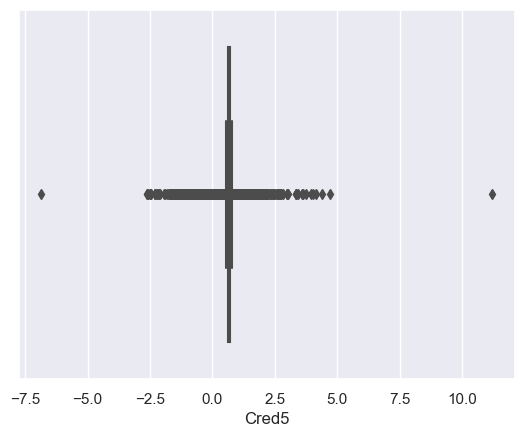

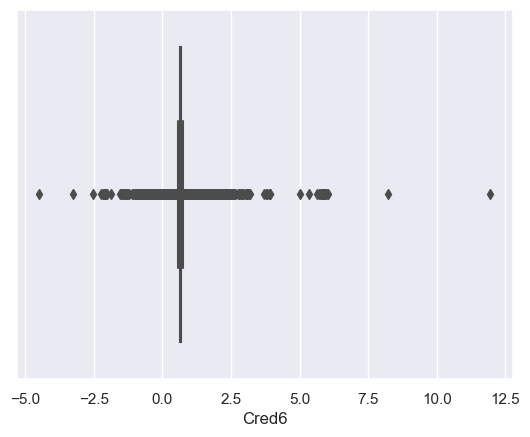

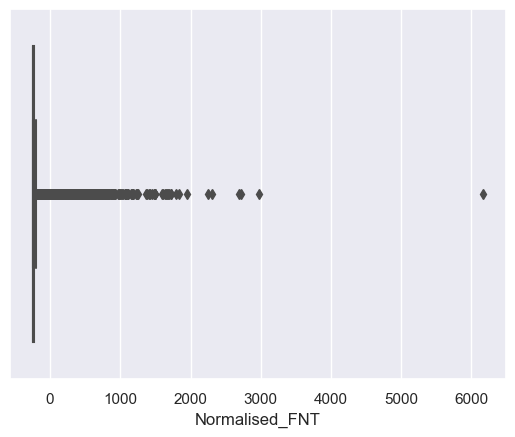

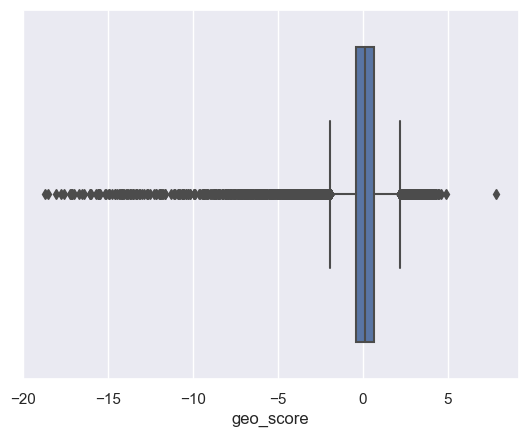

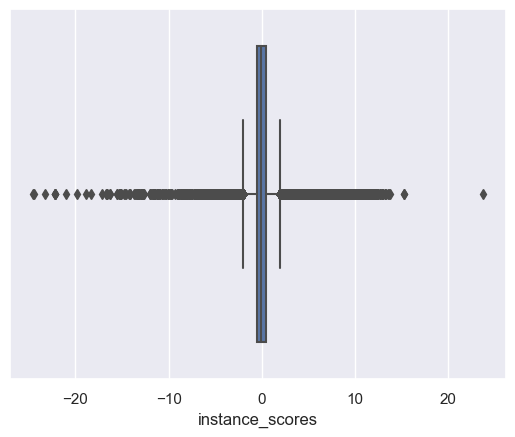

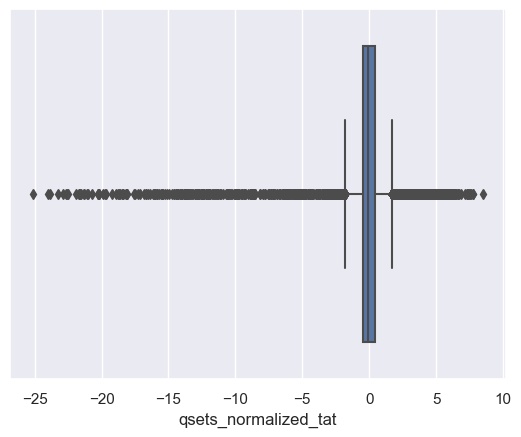

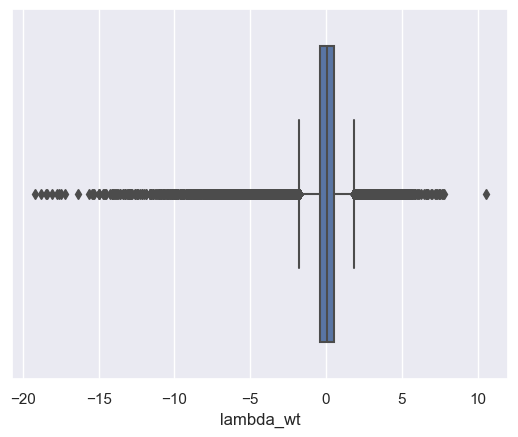

In [180]:
def boxplots(col):
    sns.boxplot(data=x_train,x=col)
    plt.show()
    
for i in list(x_train.select_dtypes(exclude=['object']).columns):
    boxplots(i)

In [181]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Per1,227845.0,0.666006,0.654133,-18.136667,0.360000,0.670000,1.103333,1.483333
Per2,227845.0,0.667701,0.548305,-23.573333,0.470000,0.690000,0.933333,8.020000
Per3,227845.0,0.666315,0.506357,-15.443333,0.370000,0.726667,1.010000,3.793333
Per4,227845.0,0.666687,0.471956,-1.226667,0.383333,0.660000,0.913333,6.163333
Per5,227845.0,0.666723,0.461393,-37.246667,0.436667,0.650000,0.870000,12.266667
Per6,227845.0,0.667378,0.444573,-8.053333,0.410000,0.576667,0.800000,25.100000
Per7,227845.0,0.666934,0.415657,-13.853333,0.483333,0.680000,0.856667,40.863333
Per8,227845.0,0.666279,0.401546,-23.740000,0.596667,0.673333,0.776667,7.336667
Per9,227845.0,0.666688,0.366537,-3.810000,0.453333,0.650000,0.866667,5.863333
Dem1,227845.0,0.666576,0.340436,-0.893333,0.413333,0.656667,0.913333,4.673333


### Handling Imbalance

In [182]:
y_train.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

#### Inference
Data is highly imbalanced and the oversampling technique will be applied to handle the imbalance

In [183]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
overSampler=RandomOverSampler()
x_train_over,y_train_over=overSampler.fit_resample(x_train,y_train)

In [184]:
print(y_train_over.value_counts())

0.0    227451
1.0    227451
Name: Target, dtype: int64


### Feature Scaling

In [185]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train_over)
x_test_scaler = scaler.transform(x_test)

In [186]:
x_train_scaler = pd.DataFrame(x_train_scaler, columns=x_train_over.columns)
x_train_scaler.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,0.630560,-0.548745,0.466992,-0.617659,0.759549,2.719543,0.301309,0.134616,0.805451,-0.904839,-0.015632,0.260899,0.668706,0.642658,-0.204085,-0.197060,-0.077801,0.131698,-0.147352,1.921311,1.136274,-0.439960,0.003776,-0.055232,-0.341099,0.737428,0.601745,0.435789,0.709083
1,0.321163,-0.059404,0.655795,0.006641,0.414547,0.341874,0.534063,-0.011917,-0.049936,-0.893788,-0.100432,0.698965,0.579001,0.211257,-0.700131,-0.416457,-0.032279,0.177566,0.057849,0.215158,-0.517394,-0.021959,-0.370581,-0.191422,-0.376390,0.625644,0.727551,0.575970,0.880676
2,0.661672,-0.889722,0.685442,-1.223136,-0.025784,0.707223,0.160996,-0.029157,-0.003356,-0.683814,0.229348,0.669097,0.813393,1.148014,-0.219833,-0.355026,-0.065386,0.388557,-0.166007,-1.419904,0.383264,-0.021959,0.003776,-0.055232,-0.143078,0.471001,0.953134,0.480847,0.626544
3,0.405858,-0.150505,0.593381,-0.454525,0.425896,-0.145259,0.606695,-0.108888,0.326942,-0.201244,-0.515013,0.061778,0.469039,0.605681,0.181729,-0.065422,-0.028141,0.608721,0.057849,1.050462,-1.122754,-0.962462,0.453005,0.534927,-0.404269,0.789123,0.766594,0.502208,0.893709
4,0.366103,-0.210371,0.520044,-0.947063,0.446323,0.051914,0.555523,-0.003298,0.365054,-0.576986,0.097436,-1.053300,0.688963,0.424903,0.008506,-0.293595,-0.172984,-0.528796,0.095158,-0.655690,-0.694572,0.270643,0.059930,-0.055232,-0.369763,0.868654,0.512813,0.447470,0.867644


In [187]:
x_test_scaler = pd.DataFrame(x_test_scaler, columns=x_test.columns)
x_test_scaler.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,-0.079844,0.200884,0.345284,-1.602735,0.307869,-0.296038,0.479589,0.177714,0.890143,-1.240059,-0.288878,-0.356376,0.772881,0.194822,-0.967839,0.118871,-0.243336,-1.005820,0.123140,0.872738,0.442324,0.772245,0.387492,0.693816,-0.403838,0.736103,0.606083,0.481515,0.902397
1,0.404129,-0.257223,0.621467,-0.900006,0.539383,-0.307636,0.647964,-0.162761,0.398930,-0.934309,0.898330,0.330591,0.512445,0.445446,-0.534783,-0.276043,0.033935,0.865580,-0.343226,0.286248,0.575208,-0.272760,-0.033660,-0.055232,-0.404818,0.775868,0.447741,0.449139,0.776417
2,0.616732,-0.423807,0.644873,-0.391782,0.316948,0.324476,0.444923,-0.074410,0.462449,-0.031792,0.502594,0.529712,0.579001,0.457772,-0.770995,-0.302371,0.017381,0.755498,-0.100716,0.552834,0.855741,-0.481760,-0.014942,-0.077930,-0.378272,0.972485,0.638619,0.484852,0.822030
3,0.741182,-0.767386,0.512242,-0.740009,0.094512,0.196894,0.309563,-0.089494,1.178095,-0.101783,0.709884,-0.645102,0.211496,1.271272,-0.889101,-0.688509,-0.350933,-1.152596,0.393632,-0.229152,-0.975105,-2.216468,-0.024301,-0.146025,0.015928,0.214736,0.686339,0.615021,1.128292
4,0.691056,-0.746563,0.465431,-0.523544,0.217079,0.434661,0.368989,-0.074410,1.584616,-0.072313,0.577972,-0.197080,0.749731,0.983671,-0.542656,-0.091750,-0.003310,0.397730,0.029867,1.317048,-0.487864,-0.795262,-0.099172,-0.123327,0.435771,0.214736,0.534504,0.530912,1.147841


### Correlation matrix

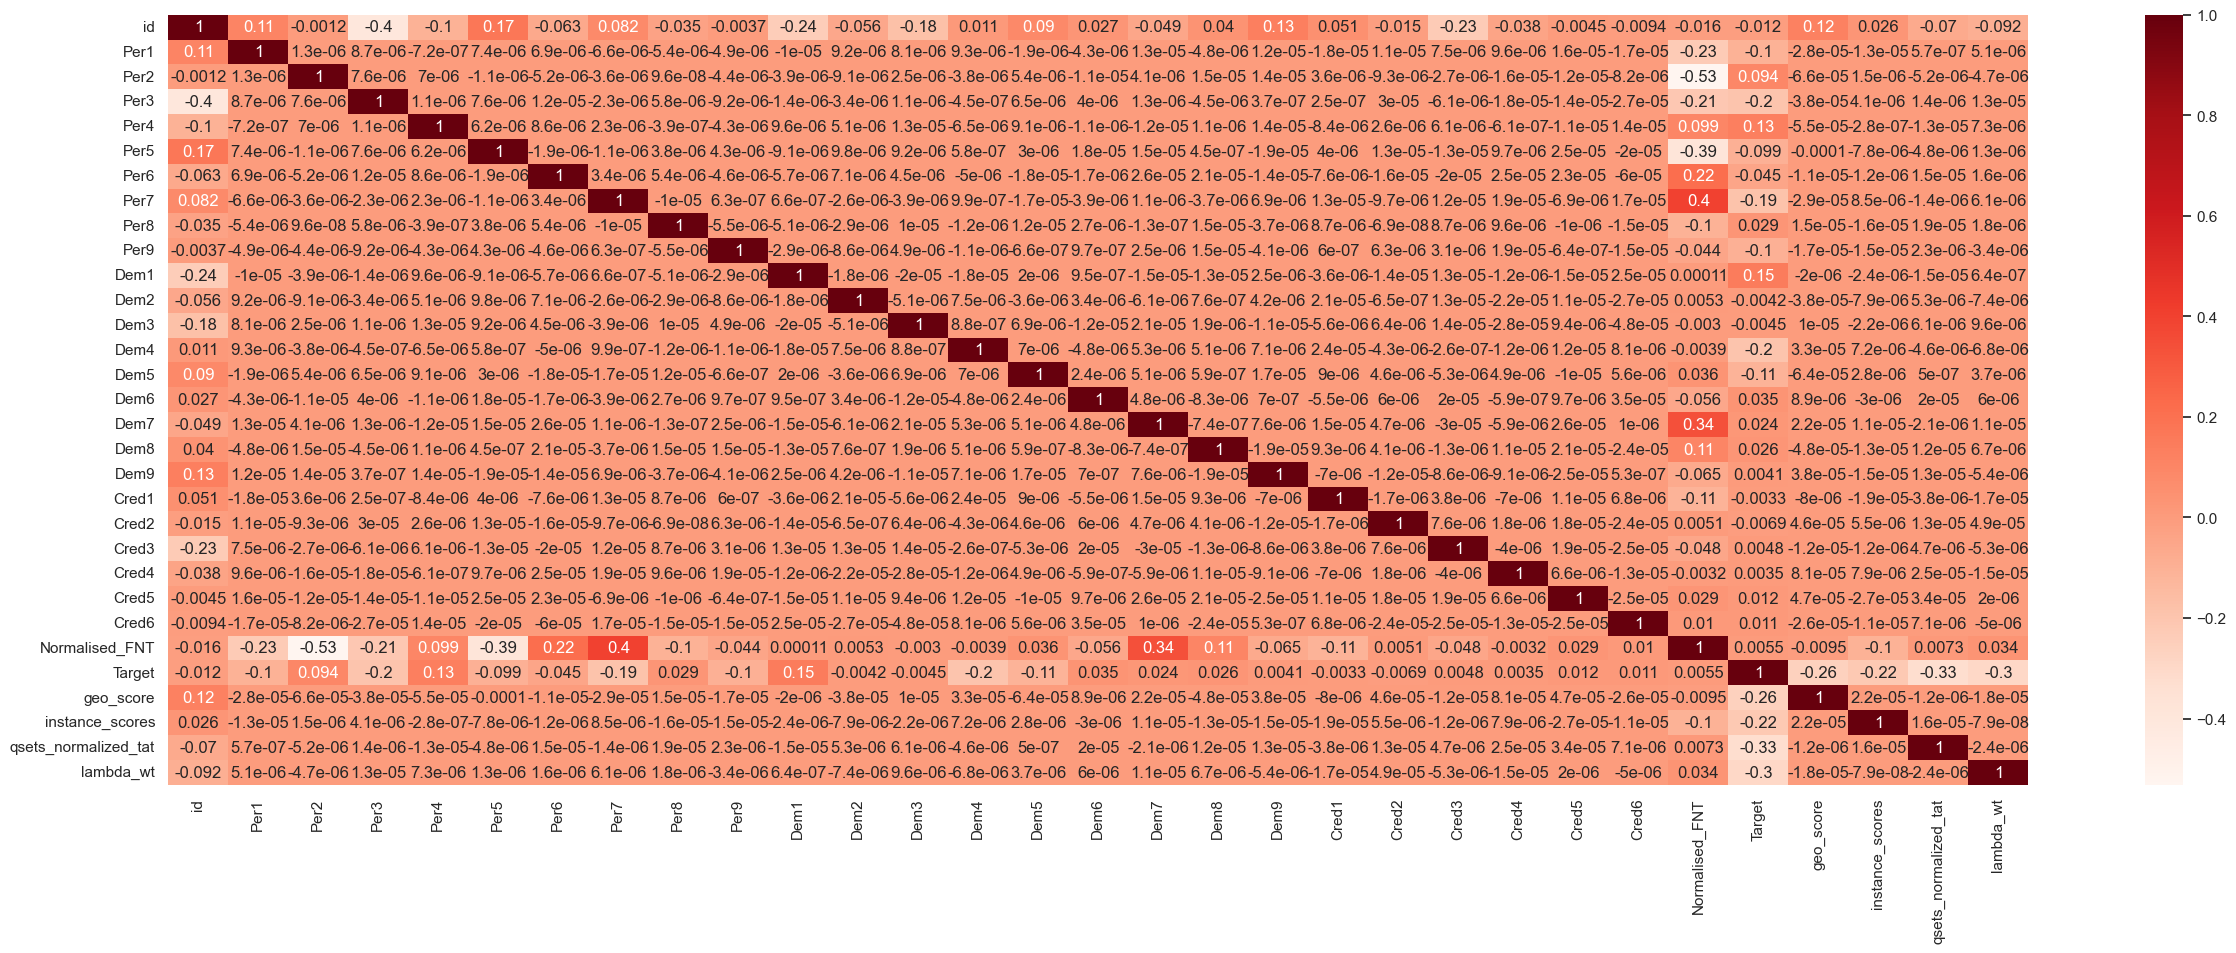

In [188]:
#Display the correlation matrix
plt.figure(figsize=(30,10))  #For less no of feaatures we can keep the size 15,15 or 20,20
sns.heatmap(final_data.corr(), annot=True, cmap="Reds")
plt.show()

### Model building

In [189]:
#Train test split
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_train_scaler, y_train_over, 
                                                    test_size=0.3,random_state=101)

#### Random forest model

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [191]:
param = {'n_estimators' : [50,70,80,90,100], 'criterion' : ['gini', 'entropy'],
        'max_depth' : [1,2,3,4,5], 'min_samples_split' :[2,3,5,6,7], 
         'min_samples_leaf' :[1,2,3,4,5],
    'min_weight_fraction_leaf': [0.0,0.1,0.5,0.9,1.0], 
    'max_features' : ["auto", "sqrt", "log2"] , 'max_leaf_nodes' : [0,1,2,3,4],
    'min_impurity_decrease' : [0.0,0.1,0.2,0.5,0.9], 'bootstrap' : [True, False],
    'oob_score' : [False,True], 'max_samples' : [1,5,10,6,8]}

In [192]:
random_forest_hyper = RandomizedSearchCV(RandomForestClassifier(),param, n_iter=10, cv=10)

In [193]:
random_forest_hyper.fit(x_train_new, y_train_new)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [0, 1, 2, 3, 4],
                                        'max_samples': [1, 5, 10, 6, 8],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.5, 0.9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 5, 6, 7],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                               

In [194]:
random_forest_hyper.best_params_

{'oob_score': True,
 'n_estimators': 50,
 'min_weight_fraction_leaf': 0.5,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.5,
 'max_samples': 5,
 'max_leaf_nodes': 3,
 'max_features': 'auto',
 'max_depth': 2,
 'criterion': 'gini',
 'bootstrap': True}

In [196]:
final_RF_model = RandomForestClassifier(n_estimators = 70, criterion='gini', max_depth=5, min_samples_split=7, min_samples_leaf=5,
    min_weight_fraction_leaf=0.5, max_features='sqrt', max_leaf_nodes=2,
    min_impurity_decrease=0.2, bootstrap=True, oob_score=True, n_jobs=None,random_state=None,
    verbose=0, warm_start=False, class_weight=None,ccp_alpha=0.0,max_samples=10)

In [197]:
final_RF_model.fit(x_train_new, y_train_new)

RandomForestClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=2,
                       max_samples=10, min_impurity_decrease=0.2,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.5, n_estimators=70,
                       oob_score=True)

In [198]:
y_pred_train = final_RF_model.predict(x_train_new)
y_pred_test = final_RF_model.predict(x_test_new)

In [199]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_train_new, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91    159253
         1.0       1.00      0.81      0.90    159178

    accuracy                           0.91    318431
   macro avg       0.92      0.91      0.90    318431
weighted avg       0.92      0.91      0.90    318431



In [200]:
print(classification_report(y_test_new, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     68198
         1.0       1.00      0.81      0.90     68273

    accuracy                           0.91    136471
   macro avg       0.92      0.91      0.90    136471
weighted avg       0.92      0.91      0.90    136471



In [201]:
print("Train Accuracy", accuracy_score(y_train_new, y_pred_train))
print("****************"*10)
print("Test Accuracy", accuracy_score(y_test_new, y_pred_test))

Train Accuracy 0.9050406524490392
****************************************************************************************************************************************************************
Test Accuracy 0.9053498545478527


### Saving the model

In [202]:
import pickle
pickle.dump(final_RF_model, open('model.pkl','wb'))

### Loading the model

In [203]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

#### Predicting with the given test data

In [204]:
y_pred = model.predict(x_test)

In [205]:
pred=pd.DataFrame(y_pred,columns=['Expected Target'])
pred.head()

,Expected Target
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [206]:
#Concatenating the results to the test dataset provided
x_test=pd.concat([x_test,pred],axis=1)

In [207]:
x_test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,Dem2,Dem3,Dem4,Dem5,Dem6,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt,Expected Target
0,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,0.546667,0.530000,0.876667,0.450000,0.370000,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76,0.0
1,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,0.966667,0.760000,0.576667,0.653333,0.553333,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18,1.0
2,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,0.826667,0.826667,0.653333,0.663333,0.453333,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39,0.0
3,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,0.900000,0.433333,0.230000,1.323333,0.403333,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80,0.0
4,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,0.853333,0.583333,0.850000,1.090000,0.550000,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89,1.0


### Exporting the test results to the result.csv

In [209]:
x_test.to_csv('result.csv')